Imports

In [3]:
%matplotlib inline
from actincme.bin.symmetricize import Symmetricize
from actincme.bin.rotate import Rotate, AverageRotate
from actincme.bin.filament import Filament
from actincme.bin.mypyntcloud import MyPyntCloud
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
# import pyvista as pv
import matplotlib.pyplot as plt

Path plus choose slices that have been manually determined to be good

In [4]:
# manually determined slices
# start_list = [1, 4, 4, 4, 5, 6, 5, 6, 5, 6, 2, 4, 5, 3, 6, 7, 1, 4, 1, 2, 1, 5, 1, 1, 1, 0, 1]
start_list = [1, 4, 4, 4, 5, 6, 5, 6, 5, 6, 2, 4, 5, 3, 6, 7, 1, 4, 1, 2, 1, 5, 1, 1, 1, 0, 1]

end_list = [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -3, -1, -1, -1, -1, -1, -1, -2, -1, -2, -1]

# membrane_path = '../actincme/pkl_files/'
# membrane_path = '../PolarityAnalysis/2018August_Tomo27/'
# membrane_path = '../PolarityAnalysis/2018_April_Tomo01/'
# membrane_path = '../PolarityAnalysis/2018June_Tomo14_Early_Invagination/'
# membrane_path = '../PolarityAnalysis/2018June_Tomo14_Late_Invagination/'
# membrane_path = '../PolarityAnalysis/2018June_Tomo26/'
# membrane_path = '../PolarityAnalysis/2018March/'
# membrane_path = '../PolarityAnalysis/2018November_32'


Choose a single membrane contour, symmetricize and rotate it

/Volumes/GoogleDrive/My Drive/Akamatsu et al 2018 actin endocytosis/Actin cortex project/actincme/actincme/bin/symmetricize.py:61: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  coords_df = pd.read_table(coordinatesfile, delim_whitespace=True)


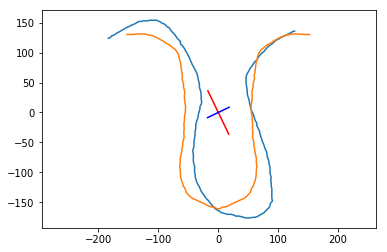

In [16]:
i = 10
#  symmetriccize contour "i" and cut off points according to the list above
shape = Symmetricize(membrane_path, i+1, start_list[i], end_list[i])

#  symmetriccize contour "i" and keep all points
# shape = Symmetricize(membrane_path, i+1, 1,-1)

# shape = Symmetricize('../actincme/pkl_files/', i+1, start_list[i], end_list[i])


# This returns normalized data
this_x, this_y, this_z = shape.do_everything_2d("fit", plot=True) #handles all the logic in symmetricizing fit curves
# can renormalize by
mean_x, mean_y = shape.get_mean_coords()
# Rotate this slice around z
this_rotate = Rotate(this_x, this_y, this_z, mean_x, mean_y)
test_x, test_y, test_z = this_rotate.rotate_steps()

Plot filament orientation relative to this, directions can be "ydir", "zdir", or "ydir_rel", "zdir_rel"

/Volumes/GoogleDrive/My Drive/Akamatsu et al 2018 actin endocytosis/Actin cortex project/actincme/actincme/bin/filament.py:26: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  coords_df = pd.read_table(f, delim_whitespace=True)
/Volumes/GoogleDrive/My Drive/Akamatsu et al 2018 actin endocytosis/Actin cortex project/actincme/actincme/bin/filament.py:119: RuntimeWarning: invalid value encountered in true_divide
  unit_vector_2 = filament_vector / np.linalg.norm(filament_vector)
/Volumes/GoogleDrive/My Drive/Akamatsu et al 2018 actin endocytosis/Actin cortex project/actincme/actincme/bin/filament.py:148: RuntimeWarning: invalid value encountered in double_scalars
  ydir = np.degrees(np.arcsin(deltayy/fil_length))
/Volumes/GoogleDrive/My Drive/Akamatsu et al 2018 actin endocytosis/Actin cortex project/actincme/actincme/bin/filament.py:149: RuntimeWarning: invalid value encountered in double_scalars
  zdir = np.degrees(-(np.arcsin(deltazz/fil_length)))
/Vol

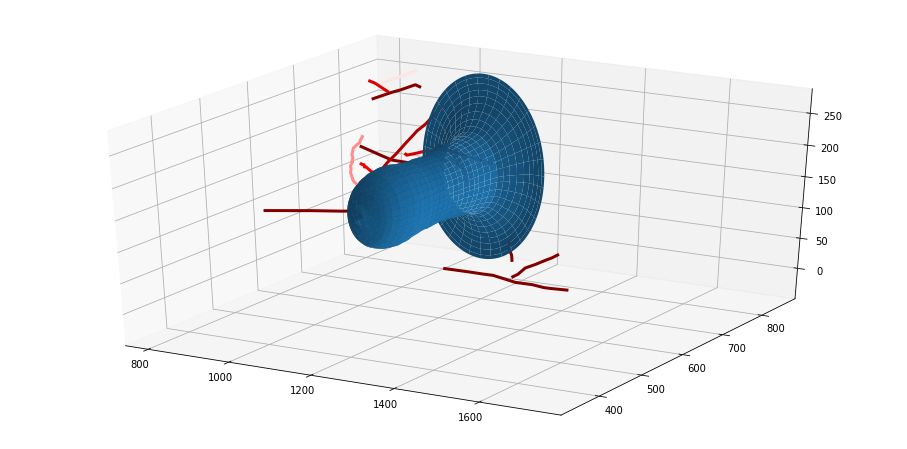

In [20]:
fig = plt.figure(figsize=[16,8])
ax=fig.add_subplot(111, projection='3d')

filaments = Filament('../Notebooks/', 'BranchedActinCoordinates_Integers')
# Compute directionality of filaments
filaments.calculate_directionality(rotated_surface=this_rotate) #handles all the logic 
# Plot the filaments
filaments.plot_filaments_and_shape(1, fig, ax, this_rotate, direction='normal_angle')

Take a look at the filament dataframe

In [18]:
filaments._filament_orientation_dataframe

,filament_ID,ydir,zdir,normal_angle,length,x_coords,y_coords,z_coords
0,1,30.403742,12.804269,61.427856,302.317714,"[1239, 1220, 1191, 1172, 1138, 1123, 1103, 108...","[581, 598, 624, 640, 667, 679, 692, 700, 713, ...","[224, 217, 210, 205, 199, 196, 193, 180, 174, ..."
1,2,NaN,NaN,NaN,0.000000,[1128],[685],[192]
2,3,70.618245,30.825513,93.501276,85.866175,"[1128, 1143, 1148, 1158]","[685, 721, 740, 766]","[192, 172, 162, 148]"
3,4,81.253838,NaN,97.979706,26.305893,"[1223, 1231, 1234, 1233]","[607, 622, 629, 633]","[208, 191, 183, 166]"
4,5,50.220991,20.521085,134.604107,74.168727,"[926, 965, 974]","[690, 739, 747]","[139, 114, 113]"
5,6,35.371426,9.938077,48.980188,278.125871,"[1121, 1086, 1053, 1027, 1006, 958, 944, 927, ...","[548, 577, 599, 620, 631, 662, 671, 686, 704, ...","[189, 177, 169, 164, 160, 155, 151, 149, 142, ..."
6,7,29.932831,18.971385,152.021310,132.268666,"[844, 873, 892, 917, 959]","[755, 772, 781, 798, 821]","[152, 136, 127, 120, 109]"
7,8,-42.443417,-2.985278,19.703869,460.835112,"[810, 830, 840, 855, 870, 886, 905, 922, 936, ...","[789, 766, 756, 735, 714, 696, 681, 663, 652, ...","[156, 158, 158, 161, 163, 159, 159, 160, 163, ..."
8,9,81.431486,2.491170,88.899179,92.027170,"[1019, 1022, 1026, 1031, 1033]","[626, 665, 681, 709, 717]","[277, 277, 277, 278, 273]"
9,10,20.545153,-2.234755,57.584759,76.935038,"[1012, 992, 961, 940]","[664, 672, 684, 691]","[278, 279, 281, 281]"


In [19]:
filaments._filament_orientation_dataframe.to_csv(membrane_path+'filament_orientations.csv')

# The rest can be ignored its for looking at the 3D membrane and calculating curvatures

Attempting to use the pointcloud package to compute curvatures along a shape

In [10]:
dim_x = this_rotate._x3d_norm
dim_y = this_rotate._y3d_norm
dim_z = this_rotate._z3d_norm
pyntobj = MyPyntCloud(dim_x, dim_y, dim_z)
pyntobj.make_cloud_object()
pyntobj.compute_scalars(num_of_neighbours=3)


PyntCloud
324 points with 7 scalar fields
0 faces in mesh
1 kdtrees
0 voxelgrids
Centroid: 1058.1213296629965, 697.5555555555555, 109.68571428571428
Other attributes:

In [11]:
fig = plt.figure(figsize=[10,8])
ax=fig.add_subplot(111, projection='3d')
pyntobj.plot_curve(fig, ax, save=True, label='curvature(4)')


In [12]:
fig = plt.figure(figsize=[10,8])
ax=fig.add_subplot(111, projection='3d')
pyntobj.plot_curve(fig, ax, save=True, name_of_file='normal', label='ny(4)')

Pyntcloud can convert their object into a PyVista mesh

In [14]:
converted_triangle_mesh = pyntobj._actual_pyntcloud_object.to_instance("pyvista", mesh=True)

In [15]:
converted_triangle_mesh

PolyData (0x139a4d210)
  N Cells:	324
  N Points:	324
  X Bounds:	9.404e+02, 1.171e+03
  Y Bounds:	5.440e+02, 8.530e+02
  Z Bounds:	-6.317e+00, 2.257e+02
  N Arrays:	7

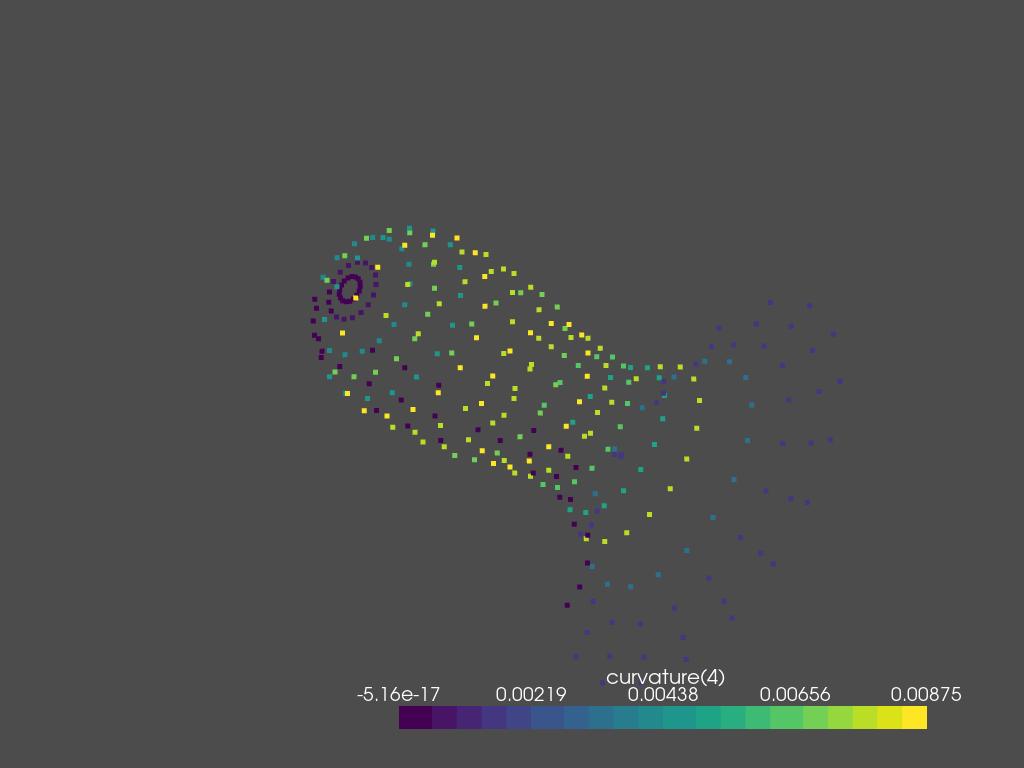

In [16]:
# Heres how bad the curvature looks
converted_triangle_mesh.plot(scalars="curvature(4)", categories=True, show_edges=True)